In [1]:
import xarray as xr
import numpy as np 
import matplotlib.pyplot as plt
import os

In [49]:
cmip_merged = xr.open_dataset("/scratch/users/yucli/enso_data/merged_data/CMIP_merged.nc")

def get_model_names_dict(cmip_ds):
    """
    Returns a dict mapping model names to the number of ensemble members for each model
    """

    models = {}
    for simulation in cmip_ds.simulation_id.values:
        model_name = simulation.split(":")[0]
        if model_name in models.keys():
            models[model_name] += 1
        else:
            models[model_name] = 1

    return models

get_model_names_dict(cmip_merged)

{'ACCESS-CM2': 3,
 'ACCESS-ESM1-5': 29,
 'BCC-CSM2-MR': 3,
 'BCC-ESM1': 2,
 'CAMS-CSM1-0': 3,
 'CESM2-FV2': 3,
 'CESM2-WACCM-FV2': 3,
 'CESM2-WACCM': 3,
 'CIESM': 3,
 'CMCC-CM2-HR4': 1,
 'CNRM-CM6-1-HR': 1,
 'CanESM5-CanOE': 3,
 'CanESM5': 49,
 'EC-Earth3-AerChem': 2,
 'EC-Earth3-CC': 1,
 'EC-Earth3-Veg-LR': 3,
 'EC-Earth3-Veg': 6,
 'FGOALS-f3-L': 3,
 'FGOALS-g3': 5,
 'FIO-ESM-2-0': 2,
 'GFDL-CM4': 1,
 'GFDL-ESM4': 1,
 'HadGEM3-GC31-LL': 5,
 'HadGEM3-GC31-MM': 4,
 'MIROC-ES2L': 31,
 'MPI-ESM-1-2-HAM': 3,
 'MPI-ESM1-2-HR': 10,
 'MPI-ESM1-2-LR': 10,
 'MRI-ESM2-0': 6,
 'NESM3': 5}

EC-Earth3-Veg-LR 3
HadGEM3-GC31-MM 4
GFDL-CM4 1
FIO-ESM-2-0 2
EC-Earth3-Veg 6
GFDL-ESM4 1
CESM2-WACCM 3
HadGEM3-GC31-LL 5
NESM3 5
MRI-ESM2-0 6
EC-Earth3-AerChem 2
CNRM-CM6-1-HR 1
CESM2-WACCM-FV2 3
CMCC-CM2-HR4 1
ACCESS-CM2 3


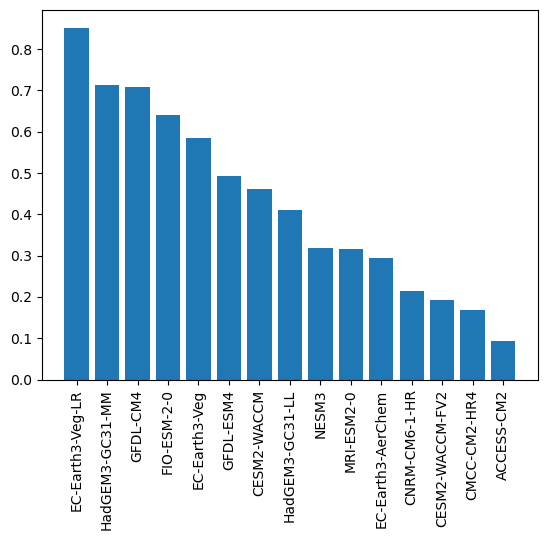

In [55]:
import pandas as pd

enso_stats_path = "/scratch/users/yucli/enso_data/ENSO_performance_CMIP_normalized.csv"

enso_stats_df = pd.read_csv(enso_stats_path)
enso_stats_df = enso_stats_df.rename(columns={"Unnamed: 0": "model_name"})

# Clean the "model_name" column to remove extra asterisks
enso_stats_df["model_name"] = enso_stats_df["model_name"].str.replace("*", "", regex=False).str.strip()

# Convert to an xarray Dataset and set "model_name" as the index
enso_stats_ds = enso_stats_df.set_index("model_name").to_xarray()

# subset to the models we have downloaded 
model_name_list = get_model_names_dict(cmip_merged).keys()
enso_stats_ds = enso_stats_ds.sel(model_name=[name for name in model_name_list \
                                    if name in enso_stats_ds.model_name.values])

enso_stats_da_list = []
for var in enso_stats_ds.variables:
    if var[0:4] == "Enso":
        enso_stats_da_list.append(enso_stats_ds.rename({var : "enso_performance_metric"})["enso_performance_metric"])

avg_enso_performance = xr.concat(enso_stats_da_list, dim="enso_performance_metric").mean("enso_performance_metric")

n = 15  
lowest_avg_models = avg_enso_performance.sortby(avg_enso_performance).isel(model_name=slice(0, n))

model_names_dict = get_model_names_dict(cmip_merged)
for model in lowest_avg_models.model_name.values:
    print(model, model_names_dict[model])
plt.bar(lowest_avg_models.model_name, -lowest_avg_models)
plt.xticks(rotation=90)
plt.show()


In [25]:
def subset_cmip_ds(ds, model_name):
    subset = [model_name == sim_id.split(":")[0] for sim_id in ds.simulation_id.values]

    return ds.isel(simulation_id=subset)

subset_cmip_ds(merged_ds, "ACCESS-CM2")


<xarray.Dataset> Size: 123MB
Dimensions:        (simulation_id: 3, time: 1980, lat: 24, lon: 72)
Coordinates:
  * simulation_id  (simulation_id) <U26 312B 'ACCESS-CM2:r1i1p1f1' ... 'ACCES...
  * time           (time) datetime64[ns] 16kB 1850-01-01 ... 2014-12-01
  * lon            (lon) float64 576B -177.5 -172.5 -167.5 ... 167.5 172.5 177.5
  * lat            (lat) float64 192B -57.5 -52.5 -47.5 -42.5 ... 47.5 52.5 57.5
Data variables:
    sst            (simulation_id, time, lat, lon) float32 41MB dask.array<chunksize=(1, 1980, 24, 72), meta=np.ndarray>
    t300           (simulation_id, time, lat, lon) float64 82MB dask.array<chunksize=(1, 1980, 24, 72), meta=np.ndarray>
    oni            (simulation_id, time) float32 24kB dask.array<chunksize=(1, 1980), meta=np.ndarray>

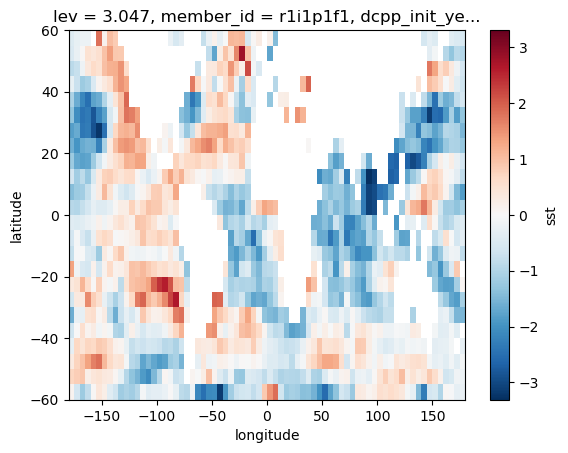

In [5]:
cmip_sample = xr.open_dataset(f"/scratch/users/yucli/enso_data/cmip/NESM3_r1i1p1f1_sst_t300.nc")
cmip_sample.isel(time=0).sst.plot()

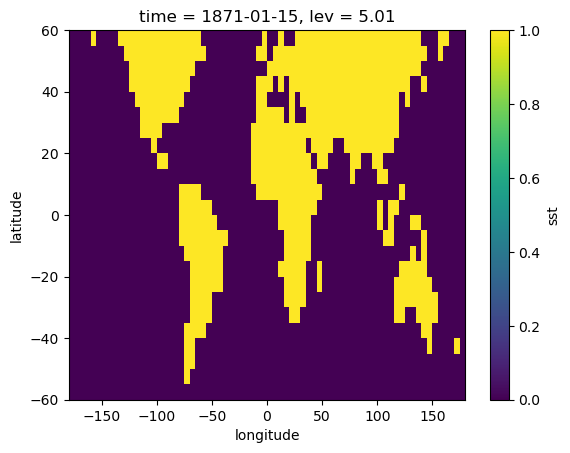

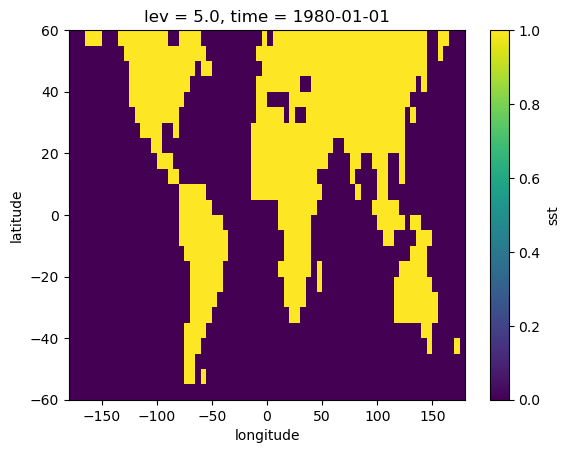

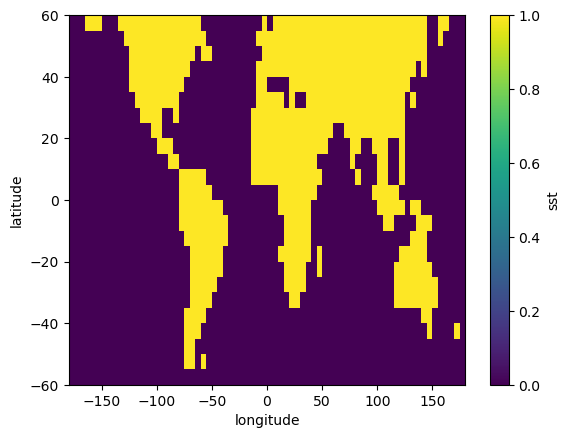

In [94]:



np.isnan(soda_sst.isel(time=0)).plot()
plt.show()
np.isnan(godas_sst.isel(time=0)).plot()
plt.show()


In [2]:
import xarray as xr

xr.open_dataset(f"/scratch/users/yucli/enso_data/cmip/HadGEM3-GC31-MM_r4i1p1f3_sst_t300.nc").sst.values

array([[[-2.7936807 , -1.5640136 , -2.0507064 , ..., -0.60383856,
          0.01349306, -1.2048674 ],
        [-1.1385835 ,  0.18303323, -0.37438574, ...,  0.49646375,
         -0.24776739, -1.1205546 ],
        [-0.43601927, -1.5063367 , -0.01287243, ..., -0.84668535,
         -1.6180867 , -1.2318721 ],
        ...,
        [-0.27981606, -0.32340932, -0.13008593, ..., -0.43508905,
         -0.30034515, -0.35377213],
        [ 0.04843916,         nan, -0.6684958 , ...,  0.18686175,
         -0.30329233, -0.1397701 ],
        [-0.8128341 , -0.7426459 , -1.3233377 , ..., -1.2174213 ,
         -0.5538461 , -0.2117919 ]],

       [[-0.56442666, -0.4585193 , -0.7837548 , ..., -0.45475727,
          0.6505012 ,  0.37006092],
        [-0.67674583,  1.2633024 ,  0.00333082, ..., -0.4153284 ,
         -0.2287345 , -0.9029593 ],
        [-0.35584983,  0.22023502,  0.18312441, ..., -1.5347655 ,
         -1.1204729 , -2.1401083 ],
        ...,
        [-0.15242249,  0.01802434,  0.05585562, ..., -

In [34]:
xr.open_dataset("/scratch/users/yucli/enso_data/reanalysis/soda/SODA_thetao_upper300m_1871.nc").temp.longitude

<xarray.DataArray 'longitude' (longitude: 720)> Size: 6kB
array([2.5000e-01, 7.5000e-01, 1.2500e+00, ..., 3.5875e+02, 3.5925e+02,
       3.5975e+02])
Coordinates:
  * longitude  (longitude) float64 6kB 0.25 0.75 1.25 1.75 ... 358.8 359.2 359.8
Attributes:
    _CoordinateAxisType:  Lon
    actual_range:         [2.5000e-01 3.5975e+02]
    axis:                 X
    direction:            I
    ioos_category:        Location
    long_name:            Longitude
    modulo:               yes
    point_spacing:        even
    standard_name:        longitude
    units:                degrees_east

In [27]:
da = xr.open_dataset("/scratch/users/yucli/enso_data/reanalysis/godas/GODAS_thetao_upper300m_1980.nc").pottmp

da = da.rename({"level": "lev"})
da

<xarray.DataArray 'pottmp' (time: 12, lev: 40, lat: 418, lon: 360)> Size: 289MB
[72230400 values with dtype=float32]
Coordinates:
  * lev      (lev) float32 160B 5.0 15.0 25.0 ... 3.483e+03 3.972e+03 4.478e+03
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * lat      (lat) float32 2kB -74.5 -74.17 -73.83 -73.5 ... 63.83 64.17 64.5
  * time     (time) datetime64[ns] 96B 1980-01-01 1980-02-01 ... 1980-12-01
Attributes: (12/15)
    dataset:                  NCEP GODAS
    var_desc:                 potential temperature
    level_desc:               Multiple Levels
    statistic:                Monthly Mean
    parent_stat:              Individual Obs
    sub_center:               Environmental Modeling Center
    ...                       ...
    level_indicator:          160
    gds_grid_type:            0
    parameter_table_version:  2
    parameter_number:         13
    actual_range:             [269.0907 305.1529]
    valid_range:              [260. 310.]

In [32]:
xr.open_dataset("/scratch/users/yucli/enso_data/reanalysis/soda")

FileNotFoundError: [Errno 2] No such file or directory: '/scratch/yucli/enso_data/reanalysis/soda/SODA_thetao_upper300m_1871.nc'

In [ ]:
def subset_data(da): 
    """
    From thetao (potential temperature), subset the SST (defined as the topmost depth)
    and T300 (weighted-average of top 300 m). 

    Note that xarray does lazy evaluation so no computation is actually done when you 
    call this. 

    Param:
        (xr.DataArray)  DataArray of ocean potential temperature 

    Returns:
        (xr.DataArray)  sst
        (xr.DataArray)  t300 
    """
    
    # get sst field 
    sst = da.isel(lev=0)

    # get top 300m temperature 
    thetao_300m = da.sel(lev=slice(0,300))

    # calculate how thick each grid cell is to take the weighted mean over depth
    lev_midpoints = np.append([0], (ds.lev[1:].values + ds.lev[:-1].values) / 2)
    lev_thickness = np.diff(lev_midpoints)
    lev_thickness = lev_thickness[0:len(thetao_300m.lev)] 
    
    lev_weights = xr.DataArray(
        data=lev_thickness,
        dims=["lev"],
        coords=dict(
            lev=thetao_300m.lev.values # the weights live at the original levs, not the midpts
        ),
    ) 
    
    t300 = thetao_300m.weighted(lev_weights).mean("lev")

    return sst, t300 


def regrid(da, model_name):
    """
    Regrid data to 5x5 grid using xesmf. 

    Param:
        (xr.DataArray)  data to regrid

    Returns:
        (xr.DataArray)  regridded 
    """

    output_grid = xe.util.grid_global(5, 5)
    start_time = time.time()
    weight_file = os.path.join(SAVE_DIRECTORY, f'grids/{model_name}_to_5x5_bilinear_weights.nc')

    if os.path.exists(weight_file):
        regridder = xe.Regridder(da, output_grid, 'bilinear', weights=weight_file, 
                                ignore_degenerate=True, reuse_weights=True, periodic=True)
    else:
        regridder = xe.Regridder(da, output_grid, 'bilinear', filename=weight_file, 
                                ignore_degenerate=True, reuse_weights=False, periodic=True)

    da_regridded = regridder(da)

    return da_regridded


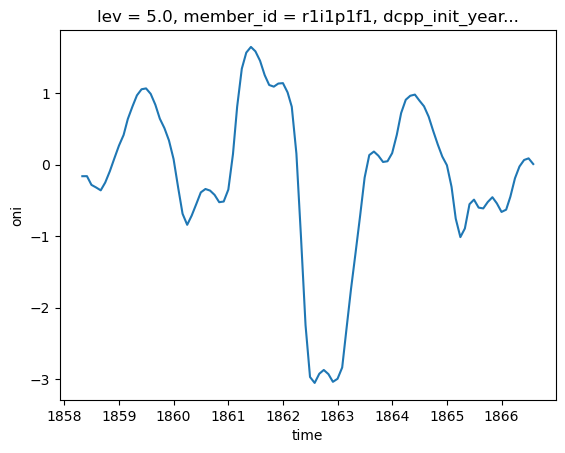

In [67]:
test_ds.oni.isel(time=slice(100,200)).plot()

# Preprocessed data

In [7]:
import xarray as xr
import numpy as np

preprocessed_ds = xr.open_dataset("/scratch/users/yucli/enso_data/CMIP_train.nc")

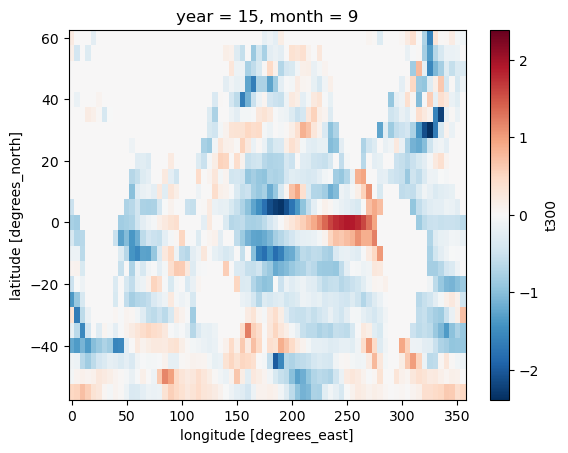

In [25]:
preprocessed_ds.t300.isel(year=14,month=8).plot()

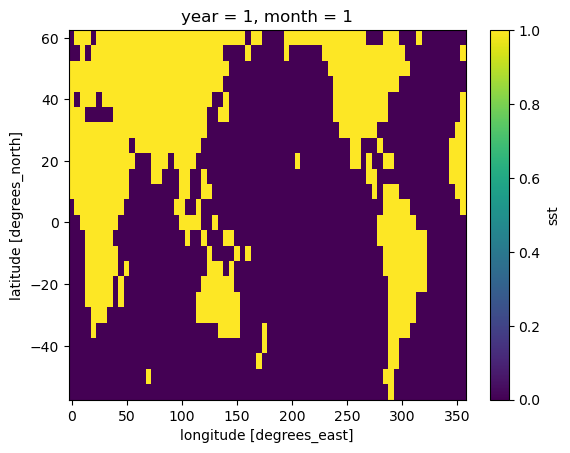

In [63]:
sea_mask = (preprocessed_ds.sst.isel(year=0,month=0) == 0)

sea_mask.plot()